# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [14]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        #d = (np.array(Image.fromarray(data[0,:].reshape((28,28))).resize(size))).flatten()
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [16]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [17]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

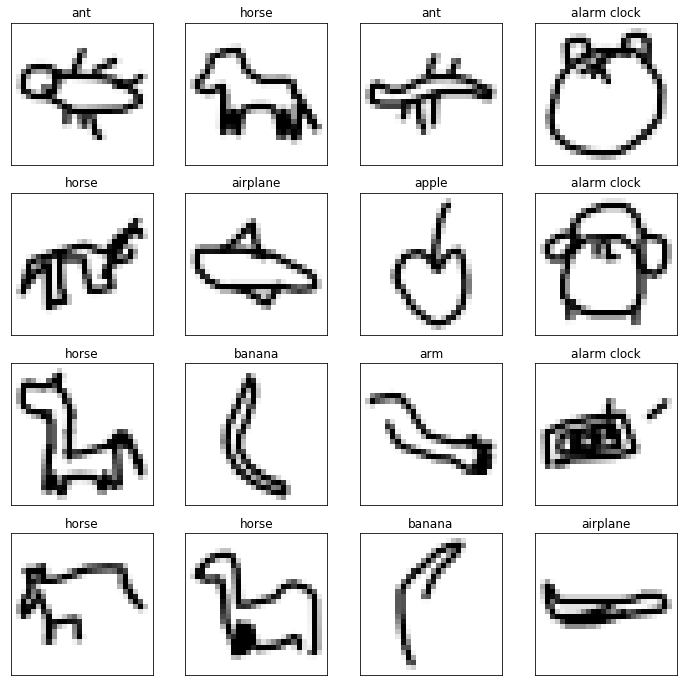

In [18]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    plt.imshow(data_train[ind,:].reshape((28,28)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [19]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [20]:
start_time2 = time.time()
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
#model.add(Dense(256, activation='relu'))
#model.add(Dense(256, activation='relu')
#model.add(Dense(256, activation='relu'))
#model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)
duration2 = time.time() - start_time2
print('Time elapsed - {} seconds.'.format(duration2))

predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))

Epoch 1/500
100000/100000 [==============================] - 6s 59us/step - loss: 3.2751 - accuracy: 0.5934
Epoch 2/500
100000/100000 [==============================] - 6s 57us/step - loss: 1.4578 - accuracy: 0.6783
Epoch 3/500
100000/100000 [==============================] - 5s 53us/step - loss: 1.4379 - accuracy: 0.7021
Epoch 4/500
100000/100000 [==============================] - 6s 57us/step - loss: 1.4136 - accuracy: 0.7090
Epoch 5/500
100000/100000 [==============================] - 7s 65us/step - loss: 1.4239 - accuracy: 0.7135
Epoch 6/500
100000/100000 [==============================] - 7s 70us/step - loss: 1.4189 - accuracy: 0.7192
Epoch 7/500
100000/100000 [==============================] - 6s 60us/step - loss: 1.4134 - accuracy: 0.7213
Epoch 8/500
100000/100000 [==============================] - 6s 65us/step - loss: 1.3939 - accuracy: 0.7277
Epoch 9/500
100000/100000 [==============================] - 7s 70us/step - loss: 1.3946 - accuracy: 0.7307
Epoch 10/500
100000/100000 [

In [21]:
#Resolution (20x20)

# data_train_20=resize_images(data_train,[20,20])
# start_time2 = time.time()
# model = Sequential()
# model.add(Dense(256, activation='relu', input_dim=data_train_20.shape[1]))
# # you can add more Dense layers here
# model.add(Dense(10, activation='softmax'))
# model.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# model.fit(data_train_20, label_train, epochs=500, batch_size=32)
# duration2 = time.time() - start_time2
# print('Time elapsed - {} seconds.'.format(duration2))

# data_test_20=resize_images(data_test,[20,20])
# predict_test = model.predict_classes(data_test_20)
# acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test_20.shape[0]
# print('Testing accuracy {}'.format(acc_test))

In [22]:
#Resolution (15x15)

# data_train_15=resize_images(data_train,[15,15])
# start_time2 = time.time()
# model = Sequential()
# model.add(Dense(256, activation='relu', input_dim=data_train_15.shape[1]))
# # you can add more Dense layers here
# model.add(Dense(10, activation='softmax'))
# model.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# model.fit(data_train_15, label_train, epochs=500, batch_size=32)
# duration2 = time.time() - start_time2
# print('Time elapsed - {} seconds.'.format(duration2))

# data_test_15=resize_images(data_test,[15,15])
# predict_test = model.predict_classes(data_test_15)
# acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test_15.shape[0]
# print('Testing accuracy {}'.format(acc_test))

In [23]:
#Resolution (10x10)

# data_train_10=resize_images(data_train,[10,10])
# start_time2 = time.time()
# model = Sequential()
# model.add(Dense(256, activation='relu', input_dim=data_train_10.shape[1]))
# # you can add more Dense layers here
# model.add(Dense(10, activation='softmax'))
# model.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# model.fit(data_train_10, label_train, epochs=500, batch_size=32)
# duration2 = time.time() - start_time2
# print('Time elapsed - {} seconds.'.format(duration2))

# data_test_10=resize_images(data_test,[10,10])
# predict_test = model.predict_classes(data_test_10)
# acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test_10.shape[0]
# print('Testing accuracy {}'.format(acc_test))

In [24]:
#Resolution (5x5)

# data_train_5=resize_images(data_train,[5,5])
# start_time2 = time.time()
# model = Sequential()
# model.add(Dense(256, activation='relu', input_dim=data_train_5.shape[1]))
# # you can add more Dense layers here
# model.add(Dense(10, activation='softmax'))
# model.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# model.fit(data_train_5, label_train, epochs=500, batch_size=32)
# duration2 = time.time() - start_time2
# print('Time elapsed - {} seconds.'.format(duration2))

# data_test_5=resize_images(data_test,[5,5])
# predict_test = model.predict_classes(data_test_5)
# acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test_5.shape[0]
# print('Testing accuracy {}'.format(acc_test))

In [25]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')